In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# !pip install imblearn
# conda install -c conda-forge imbalanced-learn

In [3]:
import imblearn
print(imblearn.__version__)

0.7.0


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from collections import Counter

counter = Counter(df.Class)
counter

Counter({0: 284315, 1: 492})

In [4]:
y = df.Class
X = df.drop(['Class'], axis = 1)

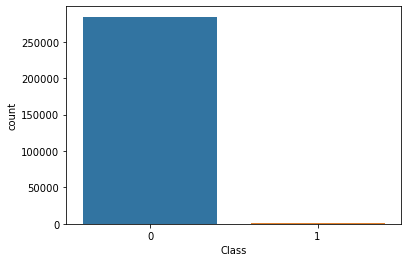

In [5]:
sns.countplot(y)

### XGBClassifier

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

[14:11:09] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9996137776061234

In [9]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
conf_matrix

array([[56872,     3],
       [   19,    68]])

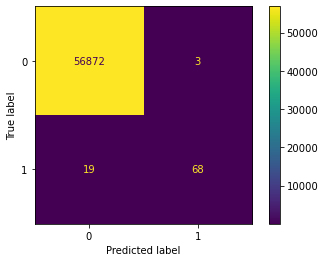

In [10]:
plot_confusion_matrix(model,X_test,y_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.96      0.78      0.86        87

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [13]:
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.8907782240747757
Accuracy score: 0.9996137776061234
F1 score: 0.860759493670886


## Resampling

In [67]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X = pca.fit_transform(X)

X.shape

(284807, 2)

In [69]:
y.unique()

array([0, 1])

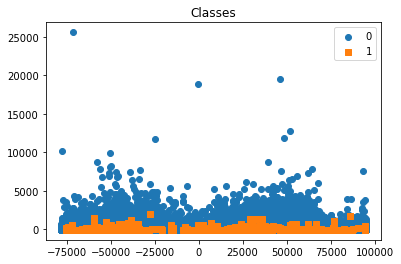

In [70]:
plot_2d_space(X,y)

In [21]:
# from numpy import where
# counter = Counter(y)
# for label, _ in counter.items():
#     row_ix = where(y==label)[0]
#     plt.scatter(X[row_ix, 0], X[row_ix, 0],label = str(label))

### Under sampling
   - random under resampling
   
   - Tomek Links (choose examples to remove): Tomek links are pairs of very close instances, but of opposite classes. 
   
   - NearMiss (choose examples to keep): 
   
        -- NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
        
        -- NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
        
        -- NearMiss-3: Majority class examples with minimum distance to each minority class example.
        
   - cluster centroids: generating centroids

#### Random under sampling

In [16]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 1, replacement=False)
X_rus, y_rus = rus.fit_resample(X, y)

print(Counter(y_rus))

X_rus_train,X_rus_test, y_rus_train,y_rus_test = train_test_split(X_rus,y_rus,test_size=0.2,random_state=1)

model.fit(X_rus_train,y_rus_train)

y_train_pred = model.predict(X_rus_train)
y_pred_rus = model.predict(X_rus_test)

conf_matrix_train = confusion_matrix(y_true=y_rus_train, y_pred = y_train_pred)
conf_matrix_rus = confusion_matrix(y_true=y_rus_test, y_pred = y_pred_rus)

print(conf_matrix_train)
print(classification_report(y_rus_train,y_train_pred))
print(conf_matrix_rus)
print(classification_report(y_rus_test,y_pred_rus))


Counter({0: 492, 1: 492})
[12:40:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[397   0]
 [  0 390]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       390

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787

[[91  4]
 [10 92]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.96      0.90      0.93       102

    accuracy                           0.93       197
   macro avg       0.93    

#### Tomek
Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Tomek’s link exists if the two samples are the nearest neighbors of each other

In [18]:
from imblearn.under_sampling import TomekLinks
import time

start =time.time()
tl = TomekLinks(sampling_strategy='majority')
x_tl, y_tl = tl.fit_resample(X, y)
print('Run time:', time.time() - start)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_tl))

Run time: 1623.5645060539246
Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284244, 1: 492})


#### NearMiss

In [73]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=1,n_neighbors=3)
x_nm, y_nm = nm.fit_resample(X,y)
print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape: Counter({0: 492, 1: 492})


### over sampling

   - random over sampling
   - SMOTE (synthetic minority oversampling technique)

#### Random over sampling

In [74]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros,y_ros = ros.fit_resample(X,y)
print(X_ros.shape[0] - X.shape[0])

X_ros_train,X_ros_test, y_ros_train,y_ros_test = train_test_split(X_ros,y_ros,test_size=0.2,random_state=1)

model.fit(X_ros_train,y_ros_train)
y_pred_ros = model.predict(X_ros_test)

conf_matrix_ros = confusion_matrix(y_true=y_ros_test, y_pred = y_pred_ros)
print(conf_matrix_ros)
print(classification_report(y_ros_test,y_pred_ros))

283823
[15:59:28] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[55484  1442]
 [  235 56565]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56926
           1       0.98      1.00      0.99     56800

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



#### SMOTE
1. SMOTE(synthetic minority oversampling technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

- Choose a minority class as the input vector
- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
- Repeat the steps until data is balanced

In [75]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

print(X_sm.shape[0]-X.shape[0])

283823


### Combining over sampling and under sampling
#### over-sampling followed by under-sampling

In [76]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_resample(X,y)

In [77]:
X_smt_train,X_smt_test, y_smt_train,y_smt_test = train_test_split(X_smt,y_smt,test_size=0.2,random_state=1)

model.fit(X_smt_train,y_smt_train)
y_pred_smt = model.predict(X_smt_test)

conf_matrix_smt = confusion_matrix(y_true=y_smt_test, y_pred = y_pred_smt)
print(conf_matrix_smt)
print(classification_report(y_smt_test,y_pred_smt))

[15:59:49] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[48161  6592]
 [ 6010 48527]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     54753
           1       0.88      0.89      0.89     54537

    accuracy                           0.88    109290
   macro avg       0.88      0.88      0.88    109290
weighted avg       0.88      0.88      0.88    109290



In [78]:
roc_auc_score(y_smt_test,y_pred_smt)

0.8847021780586464

### Penalize algorithms (cost-sensitive training)
Penalized learning algorithms: increase the cost of classification mistakes on the minority class.

In [ ]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(x_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))